# Preparación de la base de datos
Equipo 4

# **ETAPA 1: Modelos supervisados**

### Preparación del Ambiente

In [ ]:
# Instalar Liberías
!pip install kneed
!pip install graphviz

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
# Importar Librerías
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import pydotplus
import seaborn as sns
import statsmodels.api as sm

# Importar Módulos
from mlxtend.plotting import plot_confusion_matrix
from sklearn.metrics import confusion_matrix
from six import StringIO
from sklearn.tree import export_graphviz
from sklearn.model_selection import train_test_split
from sklearn import preprocessing
from sklearn.metrics import classification_report
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
from sklearn.metrics import silhouette_score

### Preparación / Manejo de los Datos / Visualización

In [ ]:
# Cargar la base de Datos
# url = 'https://raw.githubusercontent.com/David-A-T/TC2034.101/main/breast-cancer.csv?token=GHSAT0AAAAAAB7IXJCEVHSGJQYWWCY5RKHGZALOFWA'
# df = pd.read_csv(url)
df = pd.read_csv('breast-cancer.csv')

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 32 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   id                       569 non-null    int64  
 1   diagnosis                569 non-null    object 
 2   radius_mean              569 non-null    float64
 3   texture_mean             569 non-null    float64
 4   perimeter_mean           569 non-null    float64
 5   area_mean                569 non-null    float64
 6   smoothness_mean          569 non-null    float64
 7   compactness_mean         569 non-null    float64
 8   concavity_mean           569 non-null    float64
 9   concave points_mean      569 non-null    float64
 10  symmetry_mean            569 non-null    float64
 11  fractal_dimension_mean   569 non-null    float64
 12  radius_se                569 non-null    float64
 13  texture_se               569 non-null    float64
 14  perimeter_se             5

In [ ]:
#Visualizar los primeros datos del data frame
df.head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [ ]:
#Visualizar los últimos datos del data frame
df.tail()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
564,926424,M,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,...,25.450,26.40,166.10,2027.0,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115
565,926682,M,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,...,23.690,38.25,155.00,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637
566,926954,M,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,...,18.980,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820
567,927241,M,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,...,25.740,39.42,184.60,1821.0,0.16500,0.86810,0.9387,0.2650,0.4087,0.12400
568,92751,B,7.76,24.54,47.92,181.0,0.05263,0.04362,0.00000,0.00000,...,9.456,30.37,59.16,268.6,0.08996,0.06444,0.0000,0.0000,0.2871,0.07039


In [ ]:
#Visualizando el nombre de todas las columnas
df.columns

Index(['id', 'diagnosis', 'radius_mean', 'texture_mean', 'perimeter_mean',
       'area_mean', 'smoothness_mean', 'compactness_mean', 'concavity_mean',
       'concave points_mean', 'symmetry_mean', 'fractal_dimension_mean',
       'radius_se', 'texture_se', 'perimeter_se', 'area_se', 'smoothness_se',
       'compactness_se', 'concavity_se', 'concave points_se', 'symmetry_se',
       'fractal_dimension_se', 'radius_worst', 'texture_worst',
       'perimeter_worst', 'area_worst', 'smoothness_worst',
       'compactness_worst', 'concavity_worst', 'concave points_worst',
       'symmetry_worst', 'fractal_dimension_worst'],
      dtype='object')

In [ ]:
#Verificando si hay valores nulos
df.isnull().sum()

id                         0
diagnosis                  0
radius_mean                0
texture_mean               0
perimeter_mean             0
area_mean                  0
smoothness_mean            0
compactness_mean           0
concavity_mean             0
concave points_mean        0
symmetry_mean              0
fractal_dimension_mean     0
radius_se                  0
texture_se                 0
perimeter_se               0
area_se                    0
smoothness_se              0
compactness_se             0
concavity_se               0
concave points_se          0
symmetry_se                0
fractal_dimension_se       0
radius_worst               0
texture_worst              0
perimeter_worst            0
area_worst                 0
smoothness_worst           0
compactness_worst          0
concavity_worst            0
concave points_worst       0
symmetry_worst             0
fractal_dimension_worst    0
dtype: int64

In [ ]:
# Crear Variable Dummmy
df.diagnosis.replace(to_replace = "M", value = 1, inplace = True )
df.diagnosis.replace(to_replace = "B", value = 0, inplace = True )

In [ ]:
# Segmentación de los datos
y = df['diagnosis'] # Variable dependiente - Target
x = df.drop(['diagnosis', 'id'], axis=1) # Variables independientes

#Normalización de los datos
prep = preprocessing.normalize(x, axis=0)
x = pd.DataFrame(prep, columns = x.columns)
(x["radius_mean"]**2).sum()

0.9999999999999997

### Modelo 1: Bosque Aleatorio | Métrica: Gini

In [ ]:
from sklearn.ensemble import RandomForestClassifier # Importar Modulo

# Dividir datos de entrenamiento (70%) y de prueba (30%).
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=0)

# Modelo de Bosques aleatorios (10 arboles de decisión, métrica gini, 5 niveles maximo)
tree_count = 10
BA_model = RandomForestClassifier(n_estimators = tree_count, criterion="gini", max_depth=5)


In [ ]:
# Entrenar el modelo
BA_model.fit(X_train, y_train)

# Accuracy promedio
BA_model.score(X_test, y_test)

0.9473684210526315

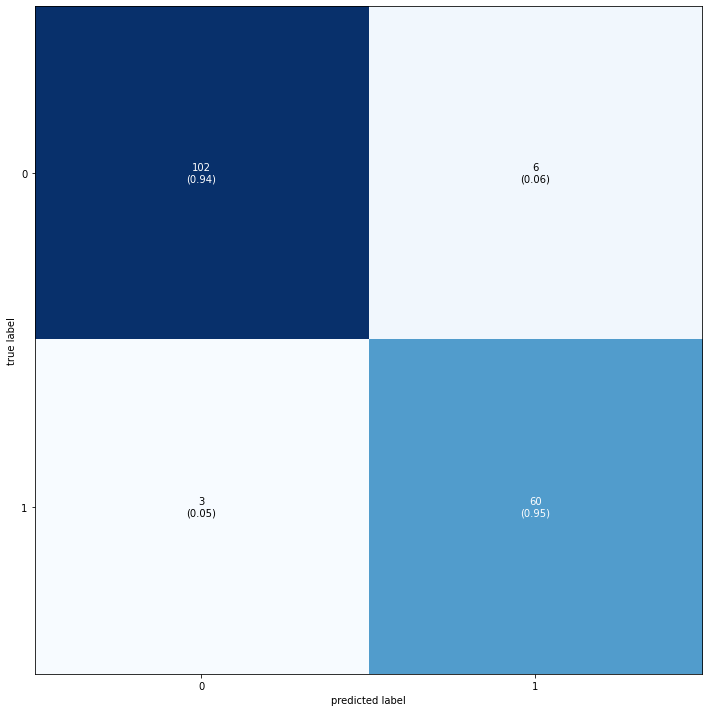

In [ ]:
# Predicción del modelo
y_pred = BA_model.predict(X_test)
matriz = confusion_matrix(y_test,y_pred)

# Matriz de Confusión
plot_confusion_matrix(conf_mat=matriz, figsize=(10,10), show_normed=True)
plt.tight_layout()

In [ ]:
# Visualizar arboles del bosque
for i in range(tree_count):
  tree_x = BA_model.estimators_[i]

  dot_data = StringIO()
  export_graphviz(tree_x, out_file=dot_data,  
                  filled=True, rounded=True,
                  special_characters=True,class_names=['0','1'])
  graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
  file_name = 'bc_tree_' +str(i) + '.png'
  graph.write_png(file_name)

### Modelo: Regresión Logística | Selección de Caracterísitcas: RFE

In [ ]:
from sklearn.feature_selection import RFE # Importar Modulo
from sklearn.linear_model import LogisticRegression # Importat Modulo

# Modelo Regresión Logística con RFE
rfe = RFE(LogisticRegression(), n_features_to_select=10)
rfe = rfe.fit(x, y)
print(rfe.support_)

[False False False  True False False  True  True False False  True False
  True  True False False False False False False False False False  True
 False  True  True  True False False]


In [ ]:
cols = []
for i, col in zip( range(len(x)), x.columns):
  if rfe.support_[i] == True:
    print("Selected: " + str(col) + " Rank: " + str(rfe.ranking_[i]))
    cols.append(col)

Selected: area_mean Rank: 1
Selected: concavity_mean Rank: 1
Selected: concave points_mean Rank: 1
Selected: radius_se Rank: 1
Selected: perimeter_se Rank: 1
Selected: area_se Rank: 1
Selected: area_worst Rank: 1
Selected: compactness_worst Rank: 1
Selected: concavity_worst Rank: 1
Selected: concave points_worst Rank: 1


In [ ]:
x_selec = x[cols]

In [ ]:
# Implementando el modelo con las variables seleccionadas
logit_model = sm.Logit(y,x_selec)
result = logit_model.fit()
print(result.summary2())

Optimization terminated successfully.
         Current function value: 0.129068
         Iterations 12
                              Results: Logit
Model:                  Logit              Pseudo R-squared:   0.805      
Dependent Variable:     diagnosis          AIC:                166.8793   
Date:                   2023-03-14 02:26   BIC:                210.3181   
No. Observations:       569                Log-Likelihood:     -73.440    
Df Model:               9                  LL-Null:            -375.72    
Df Residuals:           559                LLR p-value:        2.1986e-124
Converged:              1.0000             Scale:              1.0000     
No. Iterations:         12.0000                                           
--------------------------------------------------------------------------
                       Coef.   Std.Err.    z    P>|z|    [0.025    0.975] 
--------------------------------------------------------------------------
area_mean            -634.1

In [ ]:
# Observando los resultados del p-value, se debe buscar aquellas variables que sean significativas, es decir con un p-value menos a 0.05,
# Se descartan las que sobrepasen 0.05 en su p-value
x_sig = x_selec[['area_mean', 'concave points_mean', 'radius_se', 'area_se', 'area_worst']]

# Dividir datos de entrenamiento (70%) y de prueba (30%).
X_train, X_test, y_train, y_test = train_test_split(x_sig, y, test_size=0.3, random_state=0)

In [ ]:
# Entrenar el modelo
logreg = LogisticRegression()
logreg.fit(X_train, y_train)

LogisticRegression()

In [ ]:
# Accuracy promedio
logreg.score(X_test, y_test)

0.6900584795321637

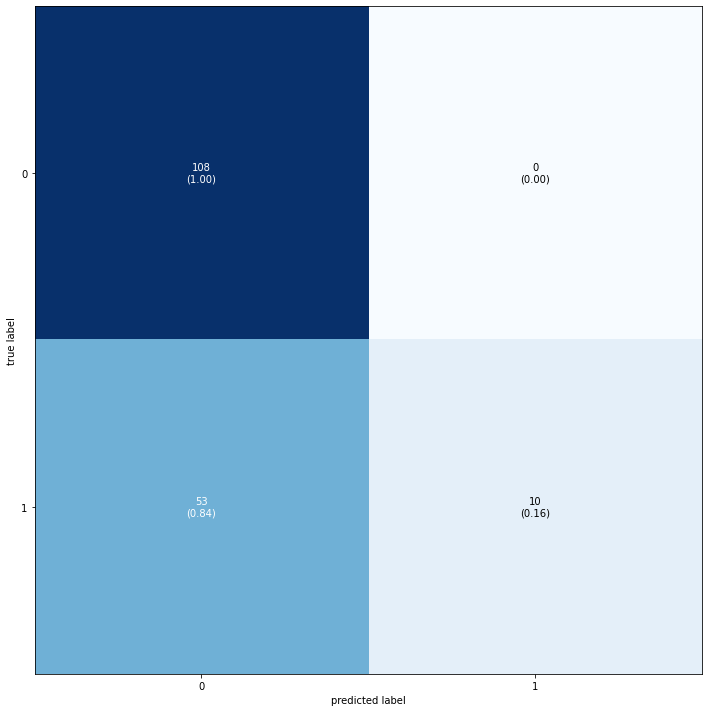

In [ ]:
# Predicción del modelo
y_pred = logreg.predict(X_test)
matriz = confusion_matrix(y_test, y_pred)

# Matriz de Confusión
plot_confusion_matrix(conf_mat=matriz, figsize=(10,10), show_normed=True)
plt.tight_layout()

In [ ]:
# Métricas: Precision, recall, F-measure and support
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.67      1.00      0.80       108
           1       1.00      0.16      0.27        63

    accuracy                           0.69       171
   macro avg       0.84      0.58      0.54       171
weighted avg       0.79      0.69      0.61       171



# **ETAPA 2: Modelos no supervisados**

Reducción de dimensionalidad con PCA



In [ ]:
#Librerías
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

In [ ]:
pca_2 = PCA(n_components=2)
pca_2_result = pca_2.fit_transform(x)
pca_2_result.shape

(569, 2)

### Modelo: K-Means

In [ ]:
df_nsk = pd.DataFrame(pca_2_result, columns = ['PC1', 'PC2'])
df_nsk.head()

,PC1,PC2
0,0.199095,-0.016644
1,0.036075,-0.062749
2,0.114292,-0.023569
3,0.120728,0.115834
4,0.093005,-0.027815


/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_kmeans.py:870: F

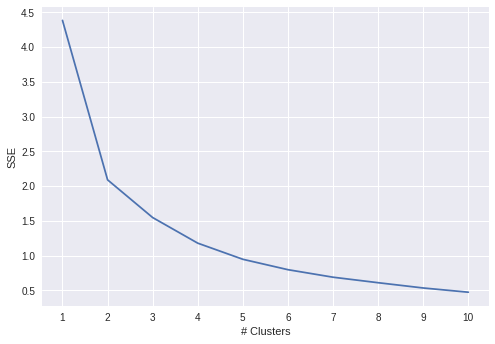

In [ ]:
from sklearn.cluster import KMeans
from kneed import KneeLocator

# Suma cuadrado de error
sse = []
for k in range(1, 11):
    kmeans = KMeans(n_clusters=k)
    kmeans.fit(df_nsk)
    sse.append(kmeans.inertia_)

# Graficar codo
plt.style.use("seaborn")
plt.plot(range(1, 11), sse)
plt.xticks(range(1, 11))
plt.xlabel("# Clusters")
plt.ylabel("SSE")
plt.show()

In [ ]:
kmeans = KMeans(n_clusters=2,random_state=0).fit(df_nsk)
clusters = pd.DataFrame(kmeans.predict(df_nsk), columns = ['clusters'])

/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


In [ ]:
clus = clusters
clus.head(25)

,clusters
0,0
1,0
2,0
3,0
4,0
5,0
6,0
7,0
8,0
9,0


In [ ]:
df3 = pd.concat([x,df_nsk,clus],axis = 1)
df3.head()

,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,...,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,PC1,PC2,clusters
0,0.051800,0.022019,0.054122,0.056456,0.050972,0.099531,0.105467,0.098797,0.055348,0.052217,...,0.080738,0.050624,0.093343,0.087052,0.084232,0.065034,0.058052,0.199095,-0.016644,0
1,0.059229,0.037695,0.058573,0.074786,0.036481,0.028196,0.030540,0.047128,0.041460,0.037595,...,0.078218,0.038639,0.026169,0.029543,0.059032,0.038871,0.043463,0.036075,-0.062749,0
2,0.056695,0.045078,0.057295,0.067849,0.047183,0.057331,0.069374,0.085901,0.047340,0.039798,...,0.068341,0.045068,0.059531,0.055076,0.077122,0.051069,0.042760,0.114292,-0.023569,0
3,0.032883,0.043232,0.034192,0.021776,0.061347,0.101790,0.084838,0.070655,0.059421,0.064642,...,0.022702,0.065480,0.121489,0.083995,0.081724,0.093827,0.084466,0.120728,0.115834,0
4,0.058423,0.030419,0.059543,0.073150,0.043179,0.047614,0.069585,0.070051,0.041391,0.039028,...,0.062983,0.042883,0.028749,0.048913,0.051574,0.033415,0.037487,0.093005,-0.027815,0


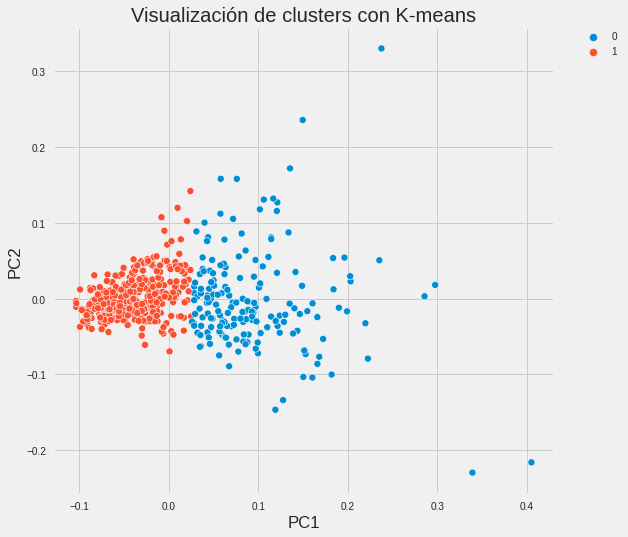

In [ ]:
plt.style.use("fivethirtyeight")
plt.figure(figsize=(8, 8))

scat = sns.scatterplot(
    data = df3, 
    x=df3['PC1'],
    y=df3['PC2'],
    s=50,
    hue = df3['clusters']
 
)

scat.set_title(
    "Visualización de clusters con K-means"
)
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.0)

plt.show()

Aplicando método de coeficiente de siluetas para obtener una referencia de qué tan bueno es el desempeño del modelo.

In [ ]:
df_nsk.head()

,PC1,PC2
0,0.199095,-0.016644
1,0.036075,-0.062749
2,0.114292,-0.023569
3,0.120728,0.115834
4,0.093005,-0.027815


In [ ]:
#Coeficiente de siluetas para K-means
from sklearn.metrics import silhouette_score
from sklearn.cluster import KMeans
from sklearn.datasets import make_blobs
silhouette_avg = silhouette_score(df_nsk, kmeans.labels_)

In [ ]:
silhouette_avg

0.5458569392619401

# **Modelo 2: DBSCAN**

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import normalize
from sklearn.cluster import KMeans, DBSCAN
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.spatial import distance
from sklearn.neighbors import NearestNeighbors

In [ ]:
#Datos normalizados y sin variable target
df_dbscn = x

Text(0, 0.5, 'Distance')

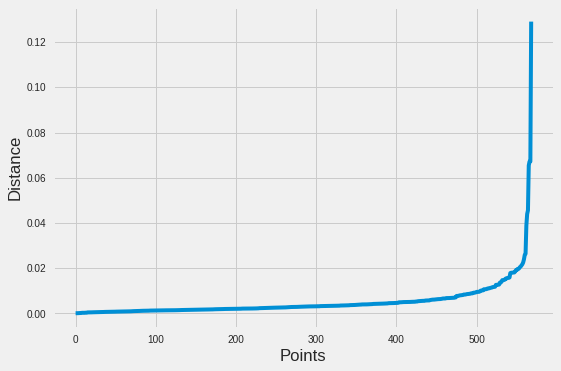

In [ ]:
#Encontrar valor óptimo para epsilon
k = 2
data_nn = pd.DataFrame(pca_2_result, columns = ['PC1', 'PC2'])

# Cálculo de NN
nearest_neighbors = NearestNeighbors(n_neighbors=k)
neighbors = nearest_neighbors.fit(data_nn)
distances, indices = neighbors.kneighbors(data_nn)
distances = np.sort(distances, axis=0)

# Obteniendo las distancias
distances = distances[:,1]

i = np.arange(len(distances))

# Gráfico de codo
sns.lineplot(
    x = i, 
    y = distances
)

plt.xlabel("Points")
plt.ylabel("Distance")

Se observa que el valor óptimo para epsilon es de aproximadamente 0.02.

In [ ]:
from sklearn.cluster import DBSCAN
from sklearn.metrics import silhouette_score
from sklearn.metrics import adjusted_rand_score

In [ ]:
#Algoritmo dbscn
dbscan = DBSCAN(eps=0.02, min_samples = 15)
dbscan.fit(data_nn)
#dbscan.fit(df_dbscn) #se ajustan los datos

DBSCAN(eps=0.02, min_samples=15)

In [ ]:
clusters2 = pd.DataFrame(DBSCAN(eps=0.02, min_samples=15).fit_predict(data_nn), columns = ['dbscan'])


In [ ]:
df4 = pd.concat([x, data_nn, clusters2],axis = 1)
df4.head(25)

,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,...,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,PC1,PC2,dbscan
0,0.051800,0.022019,0.054122,0.056456,0.050972,0.099531,0.105467,0.098797,0.055348,0.052217,...,0.080738,0.050624,0.093343,0.087052,0.084232,0.065034,0.058052,0.199095,-0.016644,-1
1,0.059229,0.037695,0.058573,0.074786,0.036481,0.028196,0.030540,0.047128,0.041460,0.037595,...,0.078218,0.038639,0.026169,0.029543,0.059032,0.038871,0.043463,0.036075,-0.062749,0
2,0.056695,0.045078,0.057295,0.067849,0.047183,0.057331,0.069374,0.085901,0.047340,0.039798,...,0.068341,0.045068,0.059531,0.055076,0.077122,0.051069,0.042760,0.114292,-0.023569,0
3,0.032883,0.043232,0.034192,0.021776,0.061347,0.101790,0.084838,0.070655,0.059421,0.064642,...,0.022702,0.065480,0.121489,0.083995,0.081724,0.093827,0.084466,0.120728,0.115834,-1
4,0.058423,0.030419,0.059543,0.073150,0.043179,0.047614,0.069585,0.070051,0.041391,0.039028,...,0.062983,0.042883,0.028749,0.048913,0.051574,0.033415,0.037487,0.093005,-0.027815,0
5,0.035848,0.033304,0.036391,0.026908,0.055018,0.060952,0.055457,0.054328,0.047752,0.050505,...,0.029656,0.055898,0.073611,0.065482,0.055255,0.056327,0.060737,0.037848,0.039298,0
6,0.052549,0.042384,0.052712,0.058656,0.040739,0.039081,0.039607,0.049700,0.041048,0.038093,...,0.064222,0.045006,0.036125,0.046271,0.061317,0.043295,0.040856,0.032081,-0.044821,0
7,0.039476,0.044187,0.039754,0.032593,0.051187,0.058980,0.032916,0.040197,0.050246,0.049430,...,0.035870,0.051622,0.051636,0.032747,0.049384,0.045175,0.056197,0.028129,0.007678,0
8,0.037432,0.046287,0.038564,0.029316,0.054803,0.069270,0.065333,0.062817,0.053770,0.049019,...,0.029564,0.053152,0.075743,0.065910,0.065379,0.061882,0.052340,0.048867,0.033958,0
9,0.035877,0.050996,0.037008,0.026841,0.051058,0.085906,0.079882,0.057377,0.046448,0.054684,...,0.028448,0.057833,0.148372,0.135121,0.070140,0.061713,0.101310,0.121278,0.127119,-1


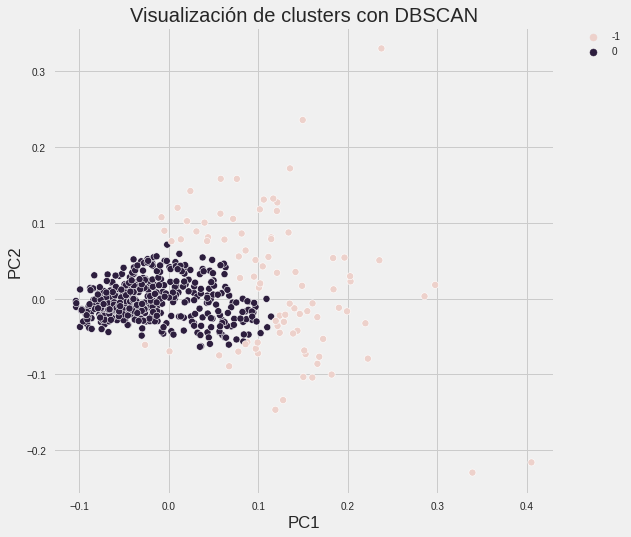

In [ ]:
plt.style.use("fivethirtyeight")
plt.figure(figsize=(8, 8))

scat = sns.scatterplot(
    data = df4, 
    x=df4['PC1'],
    y=df4['PC2'],
    s=50,
    hue = df4['dbscan']
 
)

scat.set_title(
    "Visualización de clusters con DBSCAN"
)
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.0)

plt.show()

Aplicando método de coeficiente de siluetas para obtener una referencia de qué tan bueno es el desempeño del modelo.

In [ ]:
# Silhouette scores para DBSCAN
from sklearn.metrics import silhouette_score
from sklearn.cluster import DBSCAN
from sklearn.datasets import make_blobs
silhouette_avg2 = silhouette_score(data_nn, dbscan.labels_)

In [ ]:
print(silhouette_avg2)

0.5209354344463358
